In [4]:

from langchain_groq import ChatGroq
llm = ChatGroq(
    model_name="deepseek-r1-distill-llama-70b",
    temperature=0
)
response=llm.invoke("what is length of wall of china?")

d:\Chetan Pande\AI-ML-2025\agentic-ai-2.0\langgraph_llm_tools\tools-venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
print(response.content)

<think>
Okay, so I need to figure out the length of the Great Wall of China. I remember hearing that it's really long, but I'm not exactly sure how long. I think it's somewhere in the thousands of kilometers, but I'm not certain. Let me try to break this down.

First, I know the Great Wall is a series of fortifications built across several Chinese dynasties. It wasn't built all at once, so maybe that's why the length can vary. I've heard different numbers before, like 13,000 miles or something like that, but I'm not sure if that's accurate.

I should consider the different dynasties and how much each contributed to the wall. The Qin Dynasty, I think, was the first to build a long version of the wall, but it was probably not as extensive as later versions. Then the Han Dynasty might have extended it further. The most famous parts were probably built during the Ming Dynasty, which was much later.

I also remember that the wall isn't a single continuous structure. There are sections that 

In [6]:
from langchain.tools import tool

In [7]:
@tool
def multiply(a: int, b: int) -> int:
    """
    Multiply two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The product of a and b.
    """
    return a * b

@tool
def add(a: int, b: int) -> int:
    """
    Add two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The sum of a and b.
    """
    return a + b

@tool
def divide(a: int, b: int) -> float:
    """
    Divide two integers.

    Args:
        a (int): The numerator.
        b (int): The denominator (must not be 0).

    Returns:
        float: The result of division.
    """
    if b == 0:
        raise ValueError("Denominator cannot be zero.")
    return a / b

### importing the inbuilt tool

In [1]:
from langchain_community.tools import DuckDuckGoSearchRun
search=DuckDuckGoSearchRun()

In [2]:
search.invoke("what is the latest update on iphone17 release?")

"iPhone 17 and iPhone 17 Pro, and iPhone 17 Pro Max are crafted from aluminium, while iPhone Air is titanium.The iPhone 17 range is the newest generation of models available from Apple. Below you can find links to our reviews of all iPhone models, including the latest generation. Your iPhone updates will suddenly change — here’s what you need to know.“It’s in beta testing now, but a public launch isn’t far off.” The website looks back over the last three years, where iOS 18.1, iOS 17.1 and iOS 16.1 were all released in the last week of October. Update your iPhone NOW: Apple releases iOS 26.0.01 with important security fixes - here's how to download it on your device.Apple Releases iOS 26.0.1 With Fixes for Wi-Fi, Cellular, and Camera Issues on iPhone 17 Models. 5 Things the iPhone 17 Needs. Every iPhone Release . The latest iPhone software, iOS 26, has now launched, but Apple has issued a note to users explaining how they might see a temporary drop in battery life. The iPhone 17 Pro Ma

In [8]:
tools=[multiply, add, divide, search]

In [9]:
llm_with_tools=llm.bind_tools(tools)

In [10]:
response=llm_with_tools.invoke("hi")

In [11]:
response.content

'Hello! How can I assist you today?'

In [12]:
response.tool_calls

[]

In [13]:
response=llm_with_tools.invoke("what is 2+2?")

In [14]:
response.content

''

In [15]:
response.tool_calls

[{'name': 'add',
  'args': {'a': 2, 'b': 2},
  'id': 'pbnt47z5a',
  'type': 'tool_call'}]

In [16]:
response=llm_with_tools.invoke("what is 10/2?")

In [17]:
response.tool_calls

[{'name': 'divide',
  'args': {'a': 10, 'b': 2},
  'id': '0zt0drf9s',
  'type': 'tool_call'}]

In [18]:
response=llm_with_tools.invoke("what is a current age of the TATA Group?")

In [19]:
response

AIMessage(content='To determine the current age of the TATA Group, I will use the DuckDuckGo search tool to find the exact founding year and then calculate its age.\n\n', additional_kwargs={'reasoning_content': "Okay, so I need to figure out the current age of the TATA Group. I'm not exactly sure how old they are, but I know they're a big company, probably been around for a while. Let me think about how to approach this.\n\nFirst, I should probably look up when the TATA Group was founded. I remember hearing that it's an Indian company, and it's been in existence for over a century. Maybe I can find the exact year it was established. Once I have the founding year, I can subtract that from the current year to get the age.\n\nWait, but I'm not sure about the exact founding date. I think it was in the late 1800s or early 1900s. Let me try to recall. I believe it was founded by Jamsetji Tata. I think the group started with a textile mill, and then expanded into other industries like steel a

In [20]:
response.tool_calls

[{'name': 'duckduckgo_search',
  'args': {'query': 'founding year of TATA Group'},
  'id': 'dfexzhxjs',
  'type': 'tool_call'}]

In [21]:
SYSTEM_PROMPT="You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs."

In [22]:
user_query=["tell me what is 2+2"]

In [23]:
[SYSTEM_PROMPT]+user_query

['You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs.',
 'tell me what is 2+2']

In [26]:
from langgraph.graph import MessagesState
def function_1(state:MessagesState):
    
    user_question=state["messages"]
    
    input_question = [SYSTEM_PROMPT]+user_question
    
    response = llm_with_tools.invoke(input_question)
    
    return {
        "messages":[response]
    }
    
    

In [27]:
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import MessagesState,StateGraph, END, START

In [28]:
builder=StateGraph(MessagesState)

In [29]:
builder.add_node("llm_decision_step",function_1)

In [30]:
tools

[StructuredTool(name='multiply', description='Multiply two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The product of a and b.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x00000244EAF472E0>),
 StructuredTool(name='add', description='Add two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The sum of a and b.', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x00000244BF68B380>),
 StructuredTool(name='divide', description='Divide two integers.\n\nArgs:\n    a (int): The numerator.\n    b (int): The denominator (must not be 0).\n\nReturns:\n    float: The result of division.', args_schema=<class 'langchain_core.utils.pydantic.divide'>, func=<function divide at 0x00000244EAF47380>),
 DuckDuckGoSearchRun(api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', time='y', 

In [31]:
from langgraph.prebuilt import ToolNode
builder.add_node("tools",ToolNode(tools))

In [32]:
builder.add_edge(START,"llm_decision_step")

In [33]:
from langgraph.prebuilt import tools_condition
builder.add_conditional_edges(
    "llm_decision_step",
    tools_condition,
)

In [34]:
builder.add_edge("tools","llm_decision_step")

In [35]:
react_graph=builder.compile()

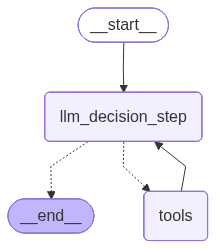

In [36]:
from IPython.display import Image, display
display(Image(react_graph.get_graph().draw_mermaid_png()))

In [37]:
message=[HumanMessage(content="What is 2 times of narendramodi's age?")]

In [38]:
react_graph.invoke({"messages":message})

{'messages': [HumanMessage(content="What is 2 times of narendramodi's age?", additional_kwargs={}, response_metadata={}, id='049127a4-3cb3-4f10-aeff-21821fa89c18'),
  AIMessage(content="To find 2 times Narendra Modi's age, I'll first look up his current age.\n\n", additional_kwargs={'reasoning_content': 'Okay, so the user is asking, "What is 2 times of narendramodi\'s age?" First, I need to figure out what exactly they\'re asking for. It seems like they want to multiply Narendra Modi\'s age by 2. \n\nTo do that, I need to find out how old Narendra Modi is. I don\'t have that information off the top of my head, so I should use the DuckDuckGo search tool to look it up. \n\nI\'ll call the duckduckgo_search function with the query "Narendra Modi age" to get the most accurate and up-to-date information. Once I have his age, I can then use the multiply function to calculate 2 times his age.\n\nI should make sure to handle any potential issues, like if the search doesn\'t return a clear age o

In [39]:
message = [HumanMessage(content="How much is the net worth of Elon Musk, and divide it by 2?")]

In [40]:
react_graph.invoke({"messages":message})

{'messages': [HumanMessage(content='How much is the net worth of Elon Musk, and divide it by 2?', additional_kwargs={}, response_metadata={}, id='4e48606f-f9ef-474b-a9db-066acd5e20c0'),
  AIMessage(content="First, I'll look up Elon Musk's current net worth.\n\n", additional_kwargs={'reasoning_content': 'Alright, so the user is asking for Elon Musk\'s net worth and then to divide it by 2. First, I need to figure out his current net worth. I remember that his net worth fluctuates a lot, especially with the value of Tesla stock and other ventures like SpaceX. I don\'t have real-time data, so I should probably look it up using the DuckDuckGo tool.\n\nOnce I have the net worth, the next step is to divide it by 2. That seems straightforward, but I need to make sure I\'m using the correct function for division. Looking at the tools available, there\'s a "divide" function that takes two integers and returns a float. So, I\'ll use that function with the net worth as the numerator and 2 as the d

In [41]:
response=react_graph.invoke({"messages":message})

In [42]:
response["messages"][-1].content

"Elon Musk's net worth as of October 2023 is estimated to be around **$230 billion**. When we divide this amount by 2, the result is:\n\n\\[\n\\boxed{115000000000.0}\n\\]"

In [43]:
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

How much is the net worth of Elon Musk, and divide it by 2?
================================== Ai Message ==================================
Tool Calls:
  duckduckgo_search (hxs9qhdt1)
 Call ID: hxs9qhdt1
  Args:
    query: Elon Musk net worth 2023
================================= Tool Message =================================
Name: duckduckgo_search

Current Net Worth As of October 2023 , Elon Musk's net worth is estimated to be around USD 230 billion, making him one of the richest individuals globally. This considerable fortune is largely attributed to his stake in several high-profile companies, including Tesla, SpaceX, Neuralink, and Boring Company. Elon Musk's Current Net Worth As of October 2023 , Elon Musk's net worth is approximately $230 billion, making him one of the world's wealthiest individuals. This figure is primarily reported by Forbes, reflecting Musk's substantial holdings and financial